In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import h5py
import itertools
import operator
import glob
import seaborn as sns
from adjustText import adjust_text
import types

from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

In [2]:
video_tr_lookup = pd.read_csv('../data/video_tr_lookup.csv')
video_tr_lookup.head()

,clipno_overall,run,clipno_in_run,clip_name,start_tr,stop_tr
0,1,MOVIE1_7T_AP,1,twomen,20,265
1,2,MOVIE1_7T_AP,2,bridgeville,285,506
2,3,MOVIE1_7T_AP,3,pockets,526,714
3,4,MOVIE1_7T_AP,4,overcome,735,798
4,5,MOVIE1_7T_AP,5,testretest1,818,901


In [26]:
rename_dict = {
    "twomen": "two men",
    "oceans": "ocean's 11",
    "socialnet": "social net",
    "homealone": "home alone",
    "starwars": "star wars"
}

video_tr_lookup.replace(rename_dict, inplace=True)
video_tr_lookupkup.head()

,clipno_overall,run,clipno_in_run,clip_name,start_tr,stop_tr
0,1,MOVIE1_7T_AP,1,two men,20,265
1,2,MOVIE1_7T_AP,2,bridgeville,285,506
2,3,MOVIE1_7T_AP,3,pockets,526,714
3,4,MOVIE1_7T_AP,4,overcome,735,798
4,5,MOVIE1_7T_AP,5,testretest1,818,901


In [27]:
f = h5py.File('../data/7T_movie_resources/WordNetFeatures.hdf5', 'r')
list(f.keys())

['MOVIE1_CC1',
 'MOVIE1_CC1_est',
 'MOVIE1_CC1_val',
 'MOVIE2_HO1',
 'MOVIE2_HO1_est',
 'MOVIE2_HO1_val',
 'MOVIE3_CC2',
 'MOVIE3_CC2_est',
 'MOVIE3_CC2_val',
 'MOVIE4_HO2',
 'MOVIE4_HO2_est',
 'MOVIE4_HO2_val',
 'synsets']

#### So these are organized as TRs x labels

In [28]:
dset = f["MOVIE1_CC1"]
print(dset.shape)
print(dset.dtype)

(921, 859)
int8


In [29]:
labels = f["synsets"]
len(labels)

859

#### What are the most common features?

In [30]:
run_name = "MOVIE1_CC1"
dset = f[run_name]
print(dset.shape)
movie_trs = f[run_name+"_est"][()] + f[run_name+"_val"][()]
print(movie_trs.shape)
mean_features = dset[()][np.where(movie_trs)].mean(axis=0)
labels[()][mean_features.argsort()[::-1]][:20]

(921, 859)
(921,)


array([b'entity.n.01', b'physical_entity.n.01', b'object.n.01',
       b'whole.n.02', b'artifact.n.01', b'living_thing.n.01',
       b'causal_agent.n.01', b'person.n.01', b'adult.n.01',
       b'abstraction.n.06', b'male.n.02', b'instrumentality.n.03',
       b'man.n.01', b'matter.n.03', b'structure.n.01', b'thing.n.12',
       b'fluid.n.02', b'gas.n.02', b'body_part.n.01',
       b'external_body_part.n.01'], dtype='|S32')

In [31]:
run_name = "MOVIE2_HO1"
dset = f[run_name]
print(dset.shape)
movie_trs = f[run_name+"_est"][()] + f[run_name+"_val"][()]
print(movie_trs.shape)
mean_features = dset[()][np.where(movie_trs)].mean(axis=0)
labels[()][mean_features.argsort()[::-1]][:20]

(918, 859)
(918,)


array([b'physical_entity.n.01', b'entity.n.01', b'object.n.01',
       b'whole.n.02', b'artifact.n.01', b'causal_agent.n.01',
       b'living_thing.n.01', b'person.n.01', b'adult.n.01',
       b'structure.n.01', b'man.n.01', b'male.n.02',
       b'instrumentality.n.03', b'abstraction.n.06', b'act.v.01',
       b'look.v.01', b'talk.v.02', b'rest.v.01', b'stand.v.01',
       b'be.v.01'], dtype='|S32')

In [32]:
run_name = "MOVIE3_CC2"
dset = f[run_name]
print(dset.shape)
movie_trs = f[run_name+"_est"][()] + f[run_name+"_val"][()]
print(movie_trs.shape)
mean_features = dset[()][np.where(movie_trs)].mean(axis=0)
labels[()][mean_features.argsort()[::-1]][:20]

(915, 859)
(915,)


array([b'entity.n.01', b'physical_entity.n.01', b'object.n.01',
       b'whole.n.02', b'artifact.n.01', b'living_thing.n.01',
       b'instrumentality.n.03', b'structure.n.01', b'abstraction.n.06',
       b'causal_agent.n.01', b'person.n.01', b'plant.n.02', b'adult.n.01',
       b'container.n.01', b'vascular_plant.n.01', b'group.n.01',
       b'matter.n.03', b'female.n.02', b'woman.n.01', b'collection.n.01'],
      dtype='|S32')

In [33]:
run_name = "MOVIE4_HO2"
dset = f[run_name]
print(dset.shape)
movie_trs = f[run_name+"_est"][()] + f[run_name+"_val"][()]
print(movie_trs.shape)
mean_features = dset[()][np.where(movie_trs)].mean(axis=0)
labels[()][mean_features.argsort()[::-1]][:20]

(901, 859)
(901,)


array([b'entity.n.01', b'object.n.01', b'physical_entity.n.01',
       b'whole.n.02', b'artifact.n.01', b'living_thing.n.01',
       b'causal_agent.n.01', b'person.n.01', b'structure.n.01',
       b'male.n.02', b'adult.n.01', b'instrumentality.n.03', b'look.v.01',
       b'travel.v.01', b'female.n.02', b'woman.n.01', b'act.v.01',
       b'talk.v.02', b'man.n.01', b'be.v.01'], dtype='|S32')

#### How about in individual clips?

In [34]:
run_name = "MOVIE1_CC1"
dset = f[run_name]
print(dset.shape)
movie_trs = f[run_name+"_est"][()] + f[run_name+"_val"][()]
print(movie_trs.shape)
clipwise_trs = [[i for i,value in it] for key,it in itertools.groupby(enumerate(movie_trs), key=operator.itemgetter(1)) if key != 0]
print(len(clipwise_trs))

n_trs = 143

for clip in range(len(clipwise_trs)):
    print(dset[()][clipwise_trs[clip][:143]].shape)
    mean_features = dset[()][clipwise_trs[clip][:143]].mean(axis=0)
    print(labels[()][mean_features.argsort()[::-1]][:20])

(921, 859)
(921,)
5
(143, 859)
[b'object.n.01' b'entity.n.01' b'physical_entity.n.01' b'whole.n.02'
 b'living_thing.n.01' b'adult.n.01' b'person.n.01' b'male.n.02'
 b'causal_agent.n.01' b'man.n.01' b'artifact.n.01' b'abstraction.n.06'
 b'matter.n.03' b'travel.v.01' b'fluid.n.02' b'gas.n.02'
 b'instrumentality.n.03' b'collection.n.01' b'travel_rapidly.v.01'
 b'vegetation.n.01']
(143, 859)
[b'physical_entity.n.01' b'object.n.01' b'whole.n.02' b'entity.n.01'
 b'artifact.n.01' b'living_thing.n.01' b'instrumentality.n.03'
 b'causal_agent.n.01' b'person.n.01' b'structure.n.01' b'adult.n.01'
 b'male.n.02' b'plant.n.02' b'woody_plant.n.01' b'tree.n.01'
 b'vascular_plant.n.01' b'matter.n.03' b'gas.n.02' b'man.n.01'
 b'fluid.n.02']
(143, 859)
[b'entity.n.01' b'physical_entity.n.01' b'object.n.01' b'whole.n.02'
 b'part.n.03' b'thing.n.12' b'body_part.n.01' b'external_body_part.n.01'
 b'artifact.n.01' b'hold.v.02' b'extremity.n.05' b'hand.n.01'
 b'living_thing.n.01' b'causal_agent.n.01' b'person.n

In [35]:
n_clips = len(video_tr_lookup["clip_name"])
n_features = len(labels)

df = pd.DataFrame(np.zeros((n_clips, n_features)), index=video_tr_lookup["clip_name"])
df.shape

(18, 859)

In [36]:
n_clips = len(video_tr_lookup["clip_name"])
n_features = len(labels)

df = pd.DataFrame(np.zeros((n_clips, n_features)), index=video_tr_lookup["clip_name"], columns=labels)

for run_name in ["MOVIE1_CC1", "MOVIE2_HO1", "MOVIE3_CC2", "MOVIE4_HO2"]:
    run_short_name = run_name.split('_')[0]
    
    dset = f[run_name]
    movie_trs = f[run_name+"_est"][()] + f[run_name+"_val"][()]
    clipwise_trs = [[i for i,value in it] for key,it in itertools.groupby(enumerate(movie_trs), key=operator.itemgetter(1)) if key != 0]
    
    n_trs = 143

    for clip_no in range(len(clipwise_trs)):
        clip_name = video_tr_lookup[(video_tr_lookup["run"].str.contains(run_short_name)) & (video_tr_lookup["clipno_in_run"]==clip_no+1)]["clip_name"]
        print(dset[()][clipwise_trs[clip_no][:143]].shape)
        mean_features = dset[()][clipwise_trs[clip_no][:143]].mean(axis=0)
        df.loc[clip_name,:] = mean_features

(143, 859)
(143, 859)
(143, 859)
(58, 859)
(77, 859)
(143, 859)
(143, 859)
(143, 859)
(77, 859)
(143, 859)
(143, 859)
(143, 859)
(136, 859)
(77, 859)
(143, 859)
(143, 859)
(143, 859)
(77, 859)


In [37]:
df

/synsets,b'abdomen.n.01',b'abstraction.n.06',b'accept.v.01',b'access.n.03',b'act.n.02',b'act.v.01',b'act.v.02',b'act.v.08',b'actinic_radiation.n.01',b'action.n.01',...,b'work.n.02',b'work.v.01',b'work.v.02',b'work_surface.n.01',b'worker.n.01',b'worsen.v.02',b'wristband.n.01',b'write.v.02',b'written_communication.n.01',b'written_record.n.01'
clip_name,,,,,,,,,,,,,,,,,,,,,
two men,0.000000,0.762238,0.000000,0.000000,0.000000,0.013986,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.412587,0.412587
bridgeville,0.000000,0.356643,0.000000,0.000000,0.062937,0.293706,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083916,0.000000
pockets,0.000000,0.405594,0.000000,0.000000,0.034965,0.230769,0.027972,0.000000,0.000000,0.034965,...,0.104895,0.000000,0.000000,0.000000,0.000000,0.000000,0.020979,0.000000,0.097902,0.000000
overcome,0.000000,0.620690,0.000000,0.000000,0.051724,0.086207,0.000000,0.051724,0.068966,0.051724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.000000
testretest1,0.051948,0.545455,0.000000,0.000000,0.051948,0.077922,0.000000,0.000000,0.000000,0.000000,...,0.025974,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.025974,0.207792,0.000000
inception,0.000000,0.881119,0.000000,0.000000,0.034965,0.398601,0.000000,0.000000,0.000000,0.034965,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
social net,0.000000,0.412587,0.000000,0.000000,0.000000,0.762238,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.251748,0.000000,0.000000,0.041958,0.000000,0.000000
ocean's 11,0.000000,0.622378,0.000000,0.000000,0.104895,0.755245,0.006993,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
testretest2,0.051948,0.545455,0.000000,0.000000,0.051948,0.077922,0.000000,0.000000,0.000000,0.000000,...,0.025974,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.025974,0.207792,0.000000


In [38]:
cogn_median_vals = pd.read_csv('../data/cogn_median_val_trs-143.csv', index_col="clip")
cogn_median_vals

,r_val
clip,
ocean's 11,0.342261
dreary,0.040545
garden,0.182495
hotel,0.141923
inception,0.222143
brokovich,0.187331
star wars,0.211377
two men,0.180369
pockets,0.216468


In [39]:
df = df.reindex(index=cogn_median_vals.index)
df.head()

/synsets,b'abdomen.n.01',b'abstraction.n.06',b'accept.v.01',b'access.n.03',b'act.n.02',b'act.v.01',b'act.v.02',b'act.v.08',b'actinic_radiation.n.01',b'action.n.01',...,b'work.n.02',b'work.v.01',b'work.v.02',b'work_surface.n.01',b'worker.n.01',b'worsen.v.02',b'wristband.n.01',b'write.v.02',b'written_communication.n.01',b'written_record.n.01'
clip,,,,,,,,,,,,,,,,,,,,,
ocean's 11,0.0,0.622378,0.0,0.0,0.104895,0.755245,0.006993,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
dreary,0.0,0.889706,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
garden,0.0,0.384615,0.0,0.0,0.027972,0.223776,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258741,0.0
hotel,0.0,0.048951,0.0,0.0,0.006993,0.000000,0.097902,0.0,0.0,0.006993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013986,0.0
inception,0.0,0.881119,0.0,0.0,0.034965,0.398601,0.000000,0.0,0.0,0.034965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [40]:
X = df[cogn_median_vals.notna().values]
Y = cogn_median_vals[cogn_median_vals.notna().values]

pls = PLSRegression(n_components=2)
pls.fit(X, Y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [41]:
from sklearn.metrics import r2_score

r2_sum = 0
for i in range(0,2):
        Y_pred=np.dot(pls.x_scores_[:,i].reshape(-1,1),pls.y_loadings_[:,i].reshape(-1,1).T)*Y.std(axis=0, ddof=1)[0]+Y.mean(axis=0)[0]
        r2_sum += round(r2_score(Y,Y_pred),3) 
        print('R2 for %d component: %g' %(i+1,round(r2_score(Y,Y_pred),3)))
print('R2 for all components (): %g' %r2_sum) #Sum of above
print('R2 for all components (): %g' %round(r2_score(Y,pls.predict(X)),3)) #Calcuted from PLSRegression's 'predict' function.

R2 for 1 component: 0.962
R2 for 2 component: 0.035
R2 for all components (): 0.997
R2 for all components (): 0.997


In [42]:
pls.coef_.shape

(859, 1)

In [43]:
print("Highest loadings:")
print(labels[()][pls.x_loadings_[:,0].argsort()[::-1][:15]])

print("Lowest loadings:")
print(labels[()][pls.x_loadings_[:,0].argsort()[:15]])

Highest loadings:
[b'act.v.01' b'talk.v.02' b'partition.n.01' b'substance.n.07'
 b'causal_agent.n.01' b'person.n.01' b'physical_entity.n.01' b'male.n.02'
 b'sit.v.01' b'look.v.01' b'man.n.01' b'consume.v.02' b'spectacles.n.01'
 b'change_posture.v.01' b'adult.n.01']
Lowest loadings:
[b'mammal.n.01' b'telephone_pole.n.01' b'post.n.04' b'sign.n.02'
 b'building_material.n.01' b'collection.n.01' b'vegetation.n.01'
 b'outbuilding.n.01' b'support.n.10' b'atmospheric_phenomenon.n.01'
 b'chordate.n.01' b'phenomenon.n.01' b'helmet.n.02'
 b'structural_member.n.01' b'upright.n.01']


(0.0, 1.0, 20.0, 0.0)

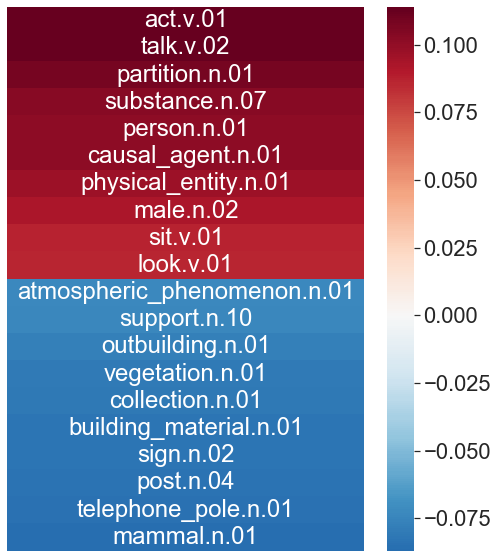

In [44]:
n_features = 10
fig, ax = plt.subplots(figsize=(8,10))

cmp = 0

sns.set(font_scale=2)
    
weights = pls.x_loadings_[:,cmp]

labeled_weights = tuple(zip(labels, weights))
labeled_weights = sorted(labeled_weights, key=lambda x: x[1])

vmin = np.min([x[1] for x in labeled_weights])
vmax = np.max([x[1] for x in labeled_weights])
cmap='RdBu_r'

# Do high
high_data = [x[1] for x in labeled_weights[-n_features:]][::-1]
high_annots = [x[0].decode('utf-8') for x in labeled_weights[-n_features:]][::-1]

# Do low
low_data = [x[1] for x in labeled_weights[:n_features]][::-1]
low_annots = [x[0].decode('utf-8') for x in labeled_weights[:n_features]][::-1]

sns.heatmap(np.atleast_2d(high_data+low_data).T, ax=ax, 
            annot=np.atleast_2d(high_annots+low_annots).T, fmt='s',
           cmap=cmap, vmin=vmin, vmax=vmax, center=0
           )

plt.axis('off')

-0.08700274202059288
0.11379386178134959


(0.0, 1.0, 10.0, 0.0)

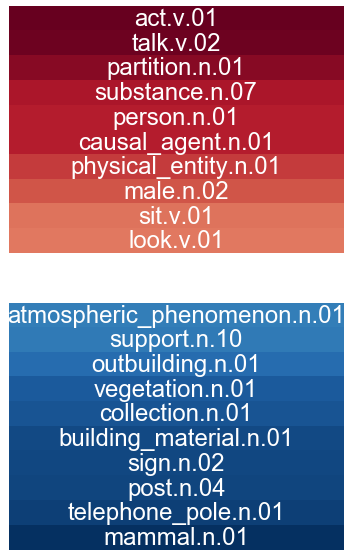

In [45]:
n_features = 10
fig, axes = plt.subplots(2,1,figsize=(6,10))

cmp = 0

sns.set(font_scale=2)
    
weights = pls.x_loadings_[:,cmp]

labeled_weights = tuple(zip(labels, weights))
labeled_weights = sorted(labeled_weights, key=lambda x: x[1])

vmin = np.min([x[1] for x in labeled_weights])
vmax = np.max(abs(np.array([x[1] for x in labeled_weights])))
# vmin = -vmax
print(np.min([x[1] for x in labeled_weights]))
print(vmax)
cmap='RdBu_r'

# Do high
high_data = [x[1] for x in labeled_weights[-n_features:]][::-1]
high_annots = [x[0].decode('utf-8') for x in labeled_weights[-n_features:]][::-1]

sns.heatmap(np.atleast_2d(high_data).T,
            annot=np.atleast_2d(high_annots).T, fmt='s',
           cmap=cmap, vmin=0, vmax=vmax,
            ax=axes[0],
            cbar=False
           )

axes[0].axis('off')

# Do low
low_data = [x[1] for x in labeled_weights[:n_features]][::-1]
low_annots = [x[0].decode('utf-8') for x in labeled_weights[:n_features]][::-1]

sns.heatmap(np.atleast_2d(low_data).T,
            annot=np.atleast_2d(low_annots).T, fmt='s',
           cmap=cmap, vmin=vmin, vmax=0,
            ax=axes[1],
            cbar=False
           )

plt.axis('off')

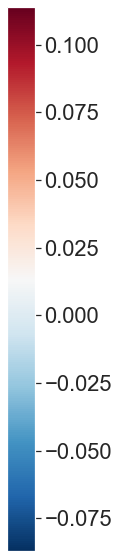

In [46]:
fig, ax = plt.subplots(figsize=(0.5,10))

cbar = mpl.colorbar.ColorbarBase(ax, cmap=mpl.cm.RdBu_r, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))

## Look at Pliers-based features

In [47]:
clip_list = cogn_median_vals.index

features = [('Brightness', 'brightness'),
            ('Optflow', 'total_flow'),
            ('RMS', 'rms')]

stats = ["mean", 
         "std"]

result = pd.DataFrame(index=clip_list, columns = [x[0]+'_'+y for x in features for y in stats])

In [49]:
n_trs = 143
start_tr_pad = 10

for clip in clip_list:
    print(clip)
    run = video_tr_lookup.query('clip_name==@clip')["run"].tolist()[0] # figure out which run this clip is in
    run = run.split('_')[0]
    start_tr = video_tr_lookup.loc[video_tr_lookup["clip_name"]==clip, "start_tr"].values[0]+start_tr_pad
    if n_trs is None:
        end_tr = video_tr_lookup.loc[video_tr_lookup["clip_name"]==clip, "stop_tr"].values[0]
    elif n_trs is not None:
        end_tr = start_tr + n_trs 
    # print("start, stop trs: {},{}".format(start_tr, end_tr))
 
    for feature, feat_col in features:
        f_name = glob.glob('../data/feature_extraction/' + feature + 'Extractor_7T_' + run + '*.csv')[0]
        data = pd.read_csv(f_name)

        tr_idx = (data["onset"]>start_tr) & (data["onset"]<end_tr)

        result.loc[clip, feature+"_mean"] = np.mean(data[feat_col][tr_idx])
        result.loc[clip, feature+"_std"] = np.std(data[feat_col][tr_idx])

ocean's 11
dreary
garden
hotel
inception
brokovich
star wars
two men
pockets
home alone
social net
bridgeville
flower


In [50]:
result

,Brightness_mean,Brightness_std,Optflow_mean,Optflow_std,RMS_mean,RMS_std
clip,,,,,,
ocean's 11,0.194174,0.0450095,308742,597097,0.00952785,0.00996102
dreary,0.345002,0.180715,461704,744793,0.00611669,0.00372078
garden,0.501991,0.118884,1.93431e+06,2.1952e+06,0.0220961,0.0117548
hotel,0.441508,0.111025,310332,435640,0.00236509,0.00425779
inception,0.224016,0.0425352,1.94851e+06,1.22648e+06,0.0281695,0.0305206
brokovich,0.50126,0.109313,2.33156e+06,2.35933e+06,0.0108872,0.00953885
star wars,0.48454,0.123043,1.45776e+06,1.43572e+06,0.0192851,0.0164125
two men,0.355873,0.102981,1.17398e+06,2.04192e+06,0.0214162,0.0184442
pockets,0.535599,0.0778494,379944,481523,0.0160316,0.00540246


Brightness_mean 0.20680065049834498
Brightness_std 0.0007664711933034373
Optflow_mean 3.320738206990718
Optflow_std 1.670554261025932
RMS_mean 2.0130361365585747
RMS_std 5.859040378726256


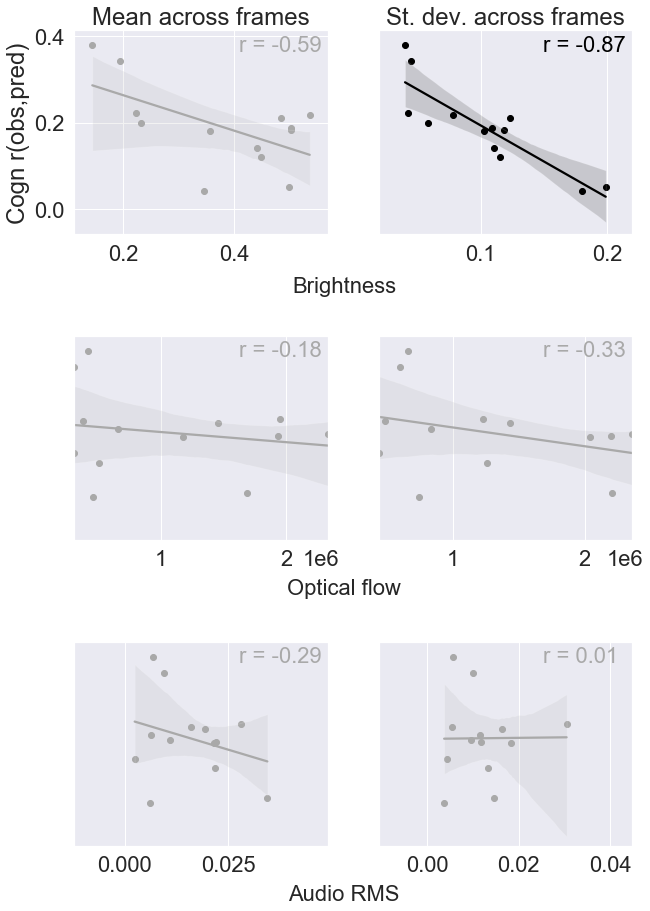

In [51]:
fig, axes = plt.subplots(3,2, figsize=(10,15), sharey=True)

cols_of_interest = ["Brightness_mean", "Brightness_std", "Optflow_mean", "Optflow_std", "RMS_mean", "RMS_std"]

plt.rcParams.update({'font.size': 22})
sns.set_style('white')

for s,stat in enumerate(result[cols_of_interest]):
    ax = axes.flatten()[s]
    x = result[stat].astype(float)
    y = cogn_median_vals.astype(float)
    
    r,p = sp.stats.pearsonr(x.values,y.values.squeeze())
    r = "{:.2f}".format(r)
    
    # Do Bonferroni correction
    p = p*len(cols_of_interest)
    if p < 0.05:
        color='black'
    else:
        color='darkgray'
        
    ax.scatter(x,y,color=color)
    sns.regplot(x=x, y=y, ax=ax, color=color, scatter=False) # use Seaborn to get the line of best fit, but not the points
    ax.annotate(f"r = {r}", xy=(0.65, 0.9), xycoords='axes fraction', color=color)
    print(stat, p)
    
    ax.set_xlabel('')
    
    if s==0:
        ax.set_ylabel("Cogn r(obs,pred)")
        ax.set_title('Mean across frames')
        
        ymin = ax.get_position().ymin
        plt.figtext(0.5, ymin-0.02, "Brightness", ha='center', fontsize=22)    
    elif s==1:
        ax.set_title('St. dev. across frames')
        ax.yaxis.set_visible(False)
    else:
        ax.yaxis.set_visible(False)
        
    pad = plt.rcParams["xtick.major.size"] + plt.rcParams["xtick.major.pad"]
    def bottom_offset(self, bboxes, bboxes2):
        bottom = self.axes.bbox.ymin
        self.offsetText.set(va="top", ha="left") 
        oy = bottom - pad * self.figure.dpi / 72.0
        self.offsetText.set_position((0.9, oy))
        
    if s==2 or s==3:
        ax.ticklabel_format(axis='x', style='sci', scilimits=(10,10000))
        ax.xaxis._update_offset_text_position = types.MethodType(bottom_offset, ax.xaxis)

    
    if s==2:
        ymin = ax.get_position().ymin
        plt.figtext(0.5, ymin-0.05, "Optical flow", ha='center', fontsize=22)   
        
    if s==4:
        ymin = ax.get_position().ymin
        plt.figtext(0.5, ymin-0.05, "Audio RMS", ha='center', fontsize=22)    

    plt.subplots_adjust(hspace=0.5)


# fig.tight_layout()

### Look at number of faces

In [52]:
n_trs = 143
start_tr_pad = 10

for clip in clip_list:
    run = video_tr_lookup.query('clip_name==@clip')["run"].tolist()[0] # figure out which run this clip is in
    run = run.split('_')[0]
    start_tr = video_tr_lookup.loc[video_tr_lookup["clip_name"]==clip, "start_tr"].values[0]+start_tr_pad
    if n_trs is None:
        end_tr = video_tr_lookup.loc[video_tr_lookup["clip_name"]==clip, "stop_tr"].values[0]
    elif n_trs is not None:
        end_tr = start_tr + n_trs 
    # print("start, stop trs: {},{}".format(start_tr, end_tr))
 
    for feature, feat_col in features:
        f_name = glob.glob('../data/feature_extraction/FaceExtractor_7T_' + run + '*.csv')[0]
        data = pd.read_csv(f_name)

        time = np.arange(start_tr,end_tr,1)
        n_faces = np.array([t in data["onset"].values for t in time]).sum()

        result.loc[clip, "n_faces"] = n_faces

result

,Brightness_mean,Brightness_std,Optflow_mean,Optflow_std,RMS_mean,RMS_std,n_faces
clip,,,,,,,
ocean's 11,0.194174,0.0450095,308742,597097,0.00952785,0.00996102,84.0
dreary,0.345002,0.180715,461704,744793,0.00611669,0.00372078,0.0
garden,0.501991,0.118884,1.93431e+06,2.1952e+06,0.0220961,0.0117548,28.0
hotel,0.441508,0.111025,310332,435640,0.00236509,0.00425779,25.0
inception,0.224016,0.0425352,1.94851e+06,1.22648e+06,0.0281695,0.0305206,84.0
brokovich,0.50126,0.109313,2.33156e+06,2.35933e+06,0.0108872,0.00953885,49.0
star wars,0.48454,0.123043,1.45776e+06,1.43572e+06,0.0192851,0.0164125,10.0
two men,0.355873,0.102981,1.17398e+06,2.04192e+06,0.0214162,0.0184442,25.0
pockets,0.535599,0.0778494,379944,481523,0.0160316,0.00540246,36.0


(0.7612591746753985, 0.0025039139614560584)
SpearmanrResult(correlation=0.6887078474798858, pvalue=0.009235079230237172)


Text(33.875, 0.5, 'Cognition r(obs, pred)')

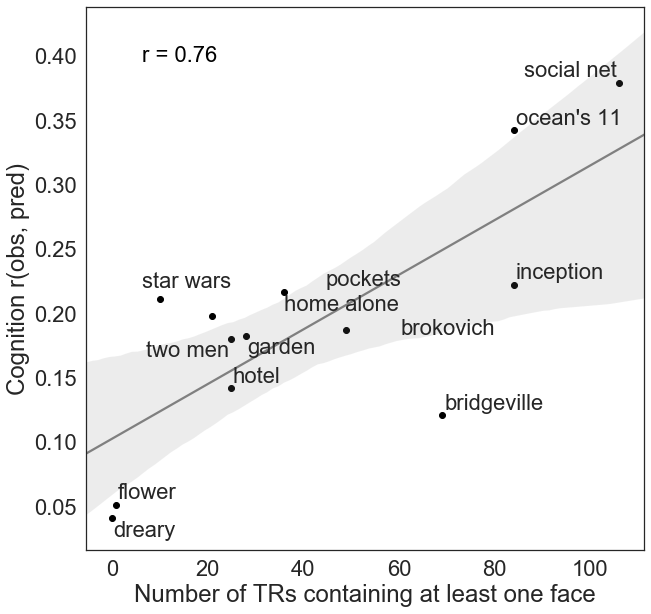

In [53]:
x = result["n_faces"]
y = np.array(cogn_median_vals).squeeze()

print(sp.stats.pearsonr(x.values,y))
print(sp.stats.spearmanr(x.values,y))

r,p = sp.stats.pearsonr(x.values, y)

fig, ax = plt.subplots(figsize=(10,10))
color='black'
ax.scatter(x,y,color=color)
sns.regplot(x=x, y=y, ax=ax, color='gray', scatter=False, truncate=False) # use Seaborn to get the line of best fit, but not the points

labels = [ax.annotate(txt, (x[i], y[i])) for i,txt in enumerate(x.index)]
adjust_text(labels)

ax.annotate(f"r = {r:.2f}", xy=(0.1, 0.9), xycoords='axes fraction', color=color)

ax.set_xlabel("Number of TRs containing at least one face")
ax.set_ylabel("Cognition r(obs, pred)")

In [54]:
result_plus_acc = result.copy()
result_plus_acc["pred_acc"] = cogn_median_vals.rename(index=rename_dict)
result_plus_acc

,Brightness_mean,Brightness_std,Optflow_mean,Optflow_std,RMS_mean,RMS_std,n_faces,pred_acc
clip,,,,,,,,
ocean's 11,0.194174,0.0450095,308742,597097,0.00952785,0.00996102,84.0,0.342261
dreary,0.345002,0.180715,461704,744793,0.00611669,0.00372078,0.0,0.040545
garden,0.501991,0.118884,1.93431e+06,2.1952e+06,0.0220961,0.0117548,28.0,0.182495
hotel,0.441508,0.111025,310332,435640,0.00236509,0.00425779,25.0,0.141923
inception,0.224016,0.0425352,1.94851e+06,1.22648e+06,0.0281695,0.0305206,84.0,0.222143
brokovich,0.50126,0.109313,2.33156e+06,2.35933e+06,0.0108872,0.00953885,49.0,0.187331
star wars,0.48454,0.123043,1.45776e+06,1.43572e+06,0.0192851,0.0164125,10.0,0.211377
two men,0.355873,0.102981,1.17398e+06,2.04192e+06,0.0214162,0.0184442,25.0,0.180369
pockets,0.535599,0.0778494,379944,481523,0.0160316,0.00540246,36.0,0.216468


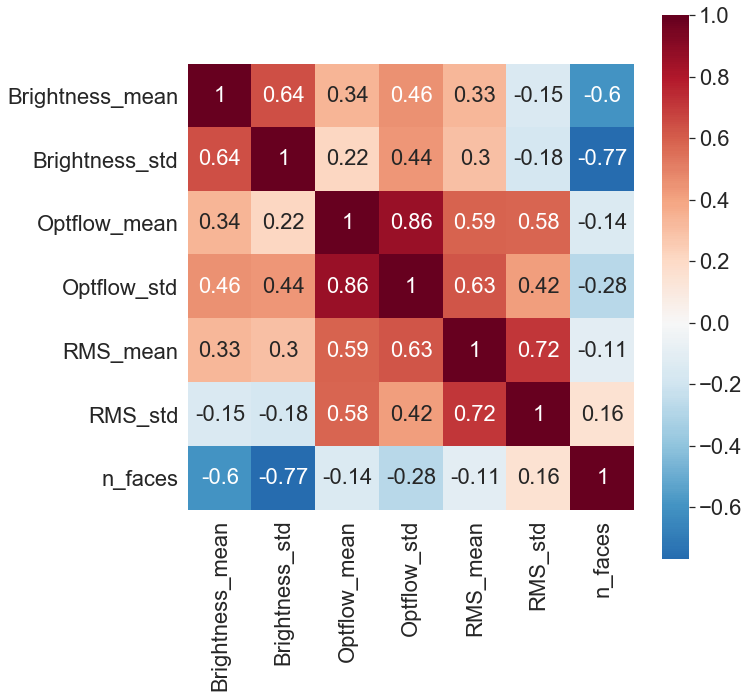

In [56]:
cols_of_interest = ["Brightness_mean", "Brightness_std", "Optflow_mean", "Optflow_std", "RMS_mean", "RMS_std", "n_faces"]

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(result[cols_of_interest].astype(float).corr(), annot=True, square=True, ax=ax, cmap='RdBu_r', center=0)